# Multi-slice alignment in the mouse brain coronal dataset (alignment process)

We present our evaluation source code of the alignment process of the mouse brain coronal dataset in this section.

## Data Preparation

First, we obtain the adata fromat data by `st_datasets`.

In [1]:
import scanpy as sc

from stMSA.utils import coor_transform, plotting
from stMSA.alignment import get_transform


adatas = sc.read_h5ad('backup/data/mouse_brain_coronal.h5ad')
adata_list = []
for i in range(7):
    adata_list.append(adatas[str(i) == adatas.obs['batch']])

/home/hanshu/anaconda3/envs/stpyg/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


## Transform matrix learning

Next, we learn the transform matrix by `stMSA.utils.get_transform`.

>>> INFO: dst slice id: 6, src slice id: 4
>>> INFO: dst coordination shape: (124, 2)
>>> INFO: src coordination shape: (96, 2)
>>> INFO: current distance: 28.69993613238758


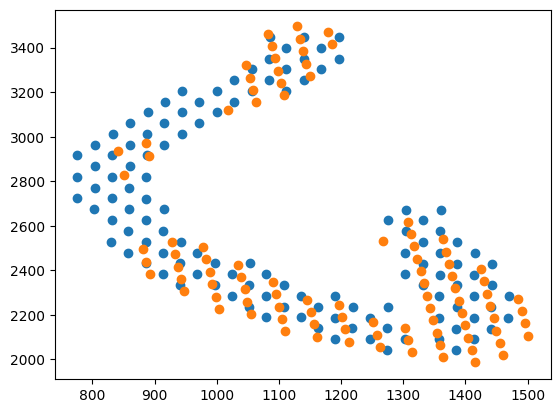

>>> INFO: dst slice id: 6, src slice id: 5
>>> INFO: dst coordination shape: (124, 2)
>>> INFO: src coordination shape: (130, 2)
>>> INFO: current distance: 26.266967812973796


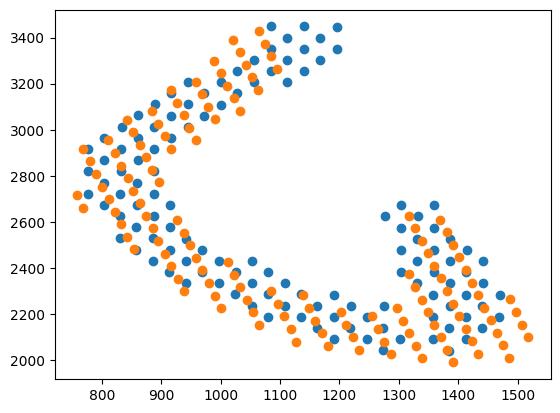

In [2]:
dst_id = 6
pyramidal_label_id = 4
src_id_list = list(range(4, 7))

M = get_transform(adata_list, dst_id, src_id_list, pyramidal_label_id)

## Visualization

we visualized the alignment result in 2D (aerial view) and 3D views.

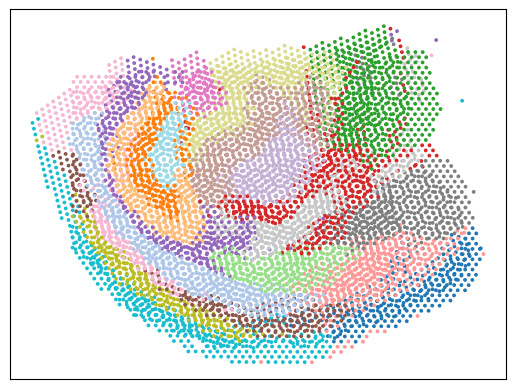

In [3]:
coor_list = [coor_transform(adata_list[src_id].obsm['spatial'], M[src_id]) for src_id in src_id_list]
label_list = [adata_list[src_id].obs['mclust'].to_numpy() for src_id in src_id_list]
plotting(coor_list, label_list, spot_size=3)

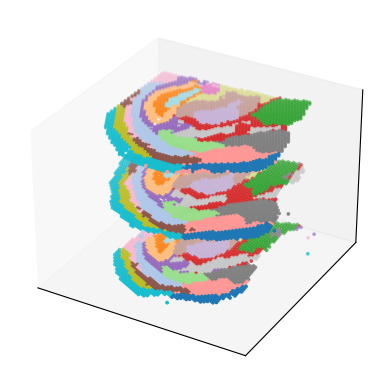

In [4]:
plotting(coor_list, label_list, dims='3d', spot_size=3)